In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime
import re
from os import listdir
import sys
import copy as cp
sys.path.insert(0, '../model_tf2')
import parameters
import plotting_functions as pf
import data_utils as du
import model_utils as mu
import behaviour_analyses as ba

# ADD YOUR DIRECTORIES HERE

path = 'C:/Users/kdais/prog/generalising-structural-knowledge-master/Summaries/'
save_dirs = [path]

# Choose which training run data to load
date = '2023-12-14'
run = '2'
index_load = None

# Try to find the most recent trained model data to run a forward pass
recent = -1
time_series_smoothing = 0
try:
    print("try")
    # Find model path and iteration index
    save_dir, index = pf.get_model_path(run, date, save_dirs, recent)
    print("index",index)
    # Run forward path for retrieved model, if folder doesn't exist yet
    model = ba.save_trained_outputs(date, run, int(index), base_path=save_dir, force_overwrite=False, n_envs_save=16)
except FileNotFoundError:
    print('No trained model weights found for ' + date + ', run ' + run + '.')
    
# Load data, generated either during training or in a forward pass through a trained model
data, para, list_of_files, save_path, env_dict = pf.get_data(save_dirs, run, date, recent, index=index, smoothing=time_series_smoothing, n_envs_save=16)

# Unpack data
x_all = data.x
g_all = data.g
p_all = data.p
acc_s_t_to = data.acc_to
acc_s_t_from = data.acc_from
positions = data.positions
adj = data.adj
x_timeseries = data.x_timeseries
x_gt_timeseries = data.x_gt_timeseries
p_timeseries = data.p_timeseries
g_timeseries = data.g_timeseries
pos_timeseries = data.pos_timeseries
final_variables = data.final_variables
# Group timeseries together for backward compatibility
timeseries = (g_timeseries, p_timeseries, pos_timeseries)
# Assign parameters
params, widths, n_states = para

# Specify plotting parameters. Some fields will be added after loading data & parameters
plot_specs = mu.DotDict({'smoothing': 0, # spatial ratemap smoothing. Needs to be odd, or 0 for no smoothing
                      'maxmin': True,
                      'cmap': 'jet',
                      'show': True,
                      'circle': True,
                      'g_max_0': False,
                      'p_max_0': True,
                      'save': False,
                      'split_freqs': True,
                      'mult': 4,
                      'cell_num': True,
                      'rectangle': {'marker_size': 20,
                                  'marker_shape': 's'},
                      'hexagonal': {'marker_size': 150,
                                  'marker_shape': 'H'},
                      'family_tree': {'marker_size': 20,
                                  'marker_shape': 'h'},
                      'line_ti': {'marker_size': 20,
                                  'marker_shape': 's'},
                      'wood2000': {'marker_size': 150,
                                  'marker_shape': 's',
                                  'plot_all': False,},
                      'frank2000': {'marker_size': 150,
                                  'marker_shape': 's',
                                  'plot_all': False,},
                      'grieves2016': {'marker_size': 50,
                                  'marker_shape': 'H',
                                  'plot_all': False,},
                      'sun2020': {'marker_size': 50,
                                  'marker_shape': 's'},
                      'nieh2021': {'marker_size': 50,
                                  'marker_shape': 's',
                                  'plot_all': False,
                                  'smooth': True,
                                  'surface': True,},
                     })

import seaborn
seaborn.set_style(style='white')
seaborn.set_style({'axes.spines.bottom': False,'axes.spines.left': False,'axes.spines.right': \
                   False,'axes.spines.top': False})

masks, g_lim, p_lim = pf.sort_data(g_all, p_all, widths, plot_specs)

try
list_of_files ['checkpoint', 'tem_0.data-00000-of-00001', 'tem_0.index']
index 0
1/48 2/48 3/48 4/48 5/48 6/48 7/48 8/48 9/48 10/48 11/48 12/48 13/48 14/48 15/48 16/48 17/48 18/48 19/48 20/48 21/48 22/48 23/48 24/48 25/48 26/48 27/48 28/48 29/48 30/48 31/48 32/48 33/48 34/48 35/48 36/48 37/48 38/48 39/48 40/48 41/48 42/48 43/48 44/48 45/48 46/48 47/48 48/48 yes C:/Users/kdais/prog/generalising-structural-knowledge-master/Summaries/2023-12-14/run2/save
Loading model time point 0
save_path C:/Users/kdais/prog/generalising-structural-knowledge-master/Summaries/2023-12-14/run2/save/iter_0
file_name C:/Users/kdais/prog/generalising-structural-knowledge-master/Summaries/2023-12-14/run2/save//params.npy
qqqqqqqq!
save_path C:/Users/kdais/prog/generalising-structural-knowledge-master/Summaries/2023-12-14/run2/save/iter_0
file_name C:/Users/kdais/prog/generalising-structural-knowledge-master/Summaries/2023-12-14/run2/save/iter_0/final_dict_0.npy
Successfully reconstructed run setup data fro

In [2]:
masks = [(np.sum(g,1) + np.sum(p,1) != 0).tolist() for g,p in zip(g_all, p_all)]
trainalbe_variables = model.trainable_weights

In [3]:
for env in range(params.n_envs_save):
    num_correct = np.sum(acc_s_t_to[env] * positions[env])
    proportion = num_correct / sum(positions[env])
    approx_num = proportion * n_states[env]
    print(env, '  Num_states : ', n_states[env], '   Approx proportion : ', np.round(proportion, decimals=3), \
          '   Approx num : ', np.round(approx_num, decimals=0))

0   Num_states :  100    Approx proportion :  [0.03]    Approx num :  [3.]
1   Num_states :  100    Approx proportion :  [0.011]    Approx num :  [1.]
2   Num_states :  121    Approx proportion :  [0.035]    Approx num :  [4.]
3   Num_states :  121    Approx proportion :  [0.02]    Approx num :  [2.]
4   Num_states :  64    Approx proportion :  [0.033]    Approx num :  [2.]
5   Num_states :  81    Approx proportion :  [0.012]    Approx num :  [1.]
6   Num_states :  100    Approx proportion :  [0.]    Approx num :  [0.]
7   Num_states :  121    Approx proportion :  [0.014]    Approx num :  [2.]
8   Num_states :  64    Approx proportion :  [0.014]    Approx num :  [1.]
9   Num_states :  81    Approx proportion :  [0.01]    Approx num :  [1.]
10   Num_states :  100    Approx proportion :  [0.046]    Approx num :  [5.]
11   Num_states :  121    Approx proportion :  [0.009]    Approx num :  [1.]
12   Num_states :  64    Approx proportion :  [0.]    Approx num :  [0.]
13   Num_states :  64  

In [4]:
env0 = 2 #2
env1 = 3
envs = [env0, env1]

## GRAPHS

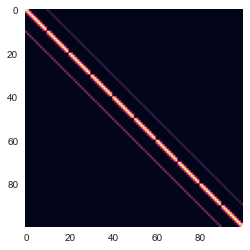

In [5]:
env_ = env_dict.curric_env.envs[0]
env_.world()
# plot different transitions in different colours
for i in range(env_.adj.shape[0]):
    for j in range(env_.adj.shape[1]):
        if env_.adj[i,j] != 0:
            ri, rt = env_.relation(i,j)
            env_.adj[i,j] = ri + 1
plt.imshow(env_.adj)
w,v = np.linalg.eig(env_.adj)

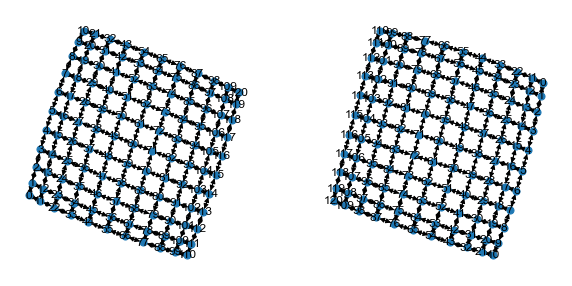

In [6]:
import networkx as nx
try:
    plt.figure(figsize=(10,5))
    for i, env in enumerate([env0, env1]):
        adj_ = pf.remove_zero_adj(adj[env])
        
        plt.subplot(1,2,i + 1)
        g = nx.from_numpy_matrix(adj_,create_using=nx.DiGraph)
        pos_nodes = nx.spring_layout(g, iterations=500)
        nx.draw(g, pos=pos_nodes, node_size=50, with_labels=True)
    
    plt.show()
except TypeError:
    plt.close('all')
    pass

## AGENT COVERAGE

[ 4 17 19 19 12 32 39 29 28 16  7  6 15 28 19 21 40 35 34 30 21 10 24 29
 35 21 23 34 43 30 17 28 17 16 22 35 29 30 36 30 19 14 29 21 23 35 26 39
 36 49 27 17 13 29 23 22 22 29 53 38 46 29 28 22 32 39 30 28 26 50 33 39
 27 36 27 32 23 33 33 34 45 33 31 34 28 27 39 27 34 42 34 38 47 34 32 33
 26 37 30 27 38 31 37 48 42 29 32 36 47 30 31 44 34 40 48 30 32 23 27 36
 16]
pos (121,)
width 11
xs (121,) (121,)
[15 28 20 20 23 24 18 19 14 26 14 29 44 44 41 22 21 31 43 25 32 27 26 40
 41 26 27 16 26 50 49 36 16 27 34 46 33 31 21 28 30 35 33 23 34 34 47 40
 27 22 26 22 24 31 34 33 45 52 34 20 17 18 19 26 36 32 39 49 40 30 32 27
 23 26 23 31 23 62 46 32 41 46 27 30 27 28 35 20 54 45 33 37 44 29 32 44
 35 33 22 26 29 36 29 31 23 22 25 24 21 21 14 15 25 26 30 22 15 22 20 17
 15]
pos (121,)
width 11
xs (121,) (121,)


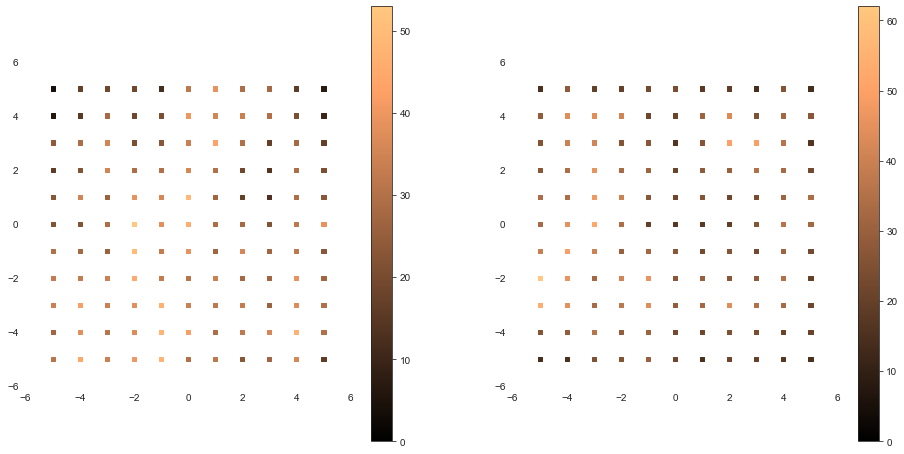

[0.] [0.]


In [7]:
plot_specs.cmap = 'copper'

try:
    s = plot_specs[parameters.old2new(params.world_type)].marker_size
    marker = plot_specs[parameters.old2new(params.world_type)].marker_shape
except:
    print('exceptiom')
    s, marker = 10, 'H'
#xs, ys = get_node_positions(env, params, plot_specs=plot_specs)
figsize = (16,8)

plt.figure(figsize=figsize) 
for i, env in enumerate([env0, env1]):
    plt.subplot(1,2,i+1)
    pos, bins = np.histogram(pos_timeseries[env], bins=np.arange(n_states[env]+1))
    #pos = np.append(pos, np.arange(127, 121))
    print(pos)
    print("pos",pos.shape)
    xs, ys, cell_prepared = env_dict.curric_env.envs[env].get_node_positions(cells=pos, _plot_specs=plot_specs)
    print("xs",xs.shape,ys.shape)
    plt.scatter(xs, ys, c=cell_prepared, s=s, marker=marker, vmin=0, cmap=plot_specs.cmap)
    plt.xlim(xmin=min(xs)-1, xmax=max(xs)+1)
    plt.ylim(ymin=min(ys)-1, ymax=max(ys)+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.colorbar()

plt.show()

print(min(positions[env0]), min(positions[env1]))

width 11
width 11


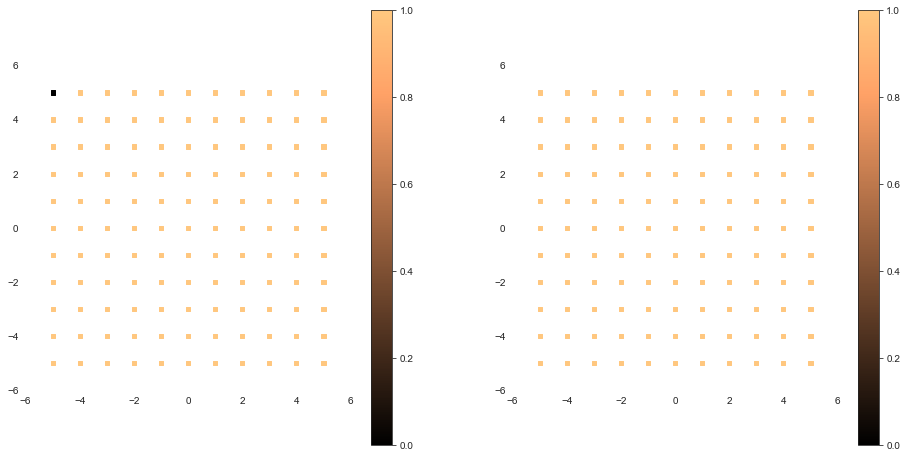

In [8]:
# where the agent didnt go much shown in black
figsize= (8 * len(envs), 8)

plt.figure(figsize=figsize)

for i, env in enumerate([env0, env1]):
    pos, bins = np.histogram(pos_timeseries[env], bins=np.arange(n_states[env]+1))
    #pos = np.append(pos, np.arange(127, 169)*0)
    a = pos > 5
    plt.subplot(1,2,i+1)
    xs, ys, cell_prepared = env_dict.curric_env.envs[env].get_node_positions(cells=a.astype(float), _plot_specs=plot_specs)
    plt.scatter(xs, ys, c=cell_prepared, s=s, marker=marker, vmin=0, cmap=plot_specs.cmap)
    plt.xlim(xmin=min(xs)-1, xmax=max(xs)+1)
    plt.ylim(ymin=min(ys)-1, ymax=max(ys)+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.colorbar()    
    
plt.show()

## ACCURACY MAPS

width 11
cell_prepared (169,) xs (121,)


ValueError: 'c' argument has 169 elements, which is inconsistent with 'x' and 'y' with size 121.

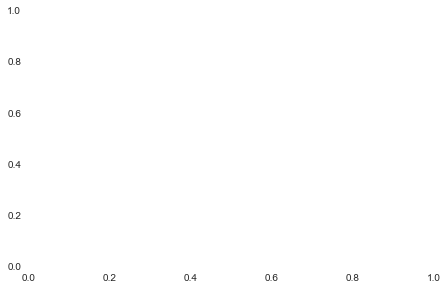

In [9]:
figsize= (8 * len(envs), 16)

plt.figure(figsize=figsize)        
for i, env in enumerate([env0, env1]):
    plt.subplot(3,2,2*i+1)    
    xs, ys, cell_prepared = env_dict.curric_env.envs[env].get_node_positions(cells=acc_s_t_to[env], _plot_specs=plot_specs)
    #cell_prepared = cell_prepared[:xs.shape[0]] #add
    print("cell_prepared",cell_prepared.shape,"xs",xs.shape)
    plt.scatter(xs, ys, c=cell_prepared, cmap=plot_specs.cmap, s=s, marker=marker, vmin=0, vmax=1)
    plt.xlim(xmin=min(xs)-1, xmax=max(xs)+1)
    plt.ylim(ymin=min(ys)-1, ymax=max(ys)+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.colorbar()
    plt.title('accuracy to : env ' + str(env))
    
    plt.subplot(3,2,2*i+2)
    xs, ys, cell_prepared = env_dict.curric_env.envs[env].get_node_positions(cells=acc_s_t_from[env], _plot_specs=plot_specs)
    #cell_prepared = cell_prepared[:xs.shape[0]] #add
    plt.scatter(xs, ys, c=cell_prepared, cmap=plot_specs.cmap, s=s, marker=marker, vmin=0, vmax=1)
    plt.xlim(xmin=min(xs)-1, xmax=max(xs)+1)
    plt.ylim(ymin=min(ys)-1, ymax=max(ys)+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.colorbar()
    plt.title('accuracy from : env ' + str(env))
    
    

# average across envs - should do this properly with position counts
env = 0
# find other envs of same size
accs_to = [acc_to for i, acc_to in enumerate(acc_s_t_to) if n_states[i] == n_states[env]]
accs_from = [acc_from for i, acc_from in enumerate(acc_s_t_from) if n_states[i] == n_states[env]]

plt.subplot(3,2,5)
xs, ys, cell_prepared = env_dict.curric_env.envs[env].get_node_positions(cells=np.mean(accs_to, axis=0), _plot_specs=plot_specs)
plt.scatter(xs, ys, c=cell_prepared, cmap=plot_specs.cmap, s=s, marker=marker, vmin=0, vmax=1)
plt.xlim(xmin=min(xs)-1, xmax=max(xs)+1)
plt.ylim(ymin=min(ys)-1, ymax=max(ys)+1)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.title('accuracy to - averaged over all envs')
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(3,2,6)
xs, ys, cell_prepared = env_dict.curric_env.envs[env].get_node_positions(cells=np.mean(accs_from, axis=0), _plot_specs=plot_specs)
plt.scatter(xs, ys, c=cell_prepared, cmap=plot_specs.cmap, s=s, marker=marker, vmin=0, vmax=1)
plt.xlim(xmin=min(xs)-1, xmax=max(xs)+1)
plt.ylim(ymin=min(ys)-1, ymax=max(ys)+1)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.title('accuracy from - averaged over all envs')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## ENTORHINAL CELLS

In [10]:
plot_specs.split_freqs = True
plot_specs.n_cells_freq = params.n_grids_all
plot_specs.cmap = 'jet'
plot_specs.node_plot = True
plot_specs.max_min = False
print(g_all.shape)

(16, 169, 120)


cells (16, 169, 120) env 2 cell (169, 120)
width 11
xs, ys (121,) (121,)
number of cells 120
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11


C:\Users\kdais\prog\generalising-structural-knowledge-master\tem_tf2\plotting_functions.py:56: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n_rows, n_cols, add_on + grid + 1)


width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11


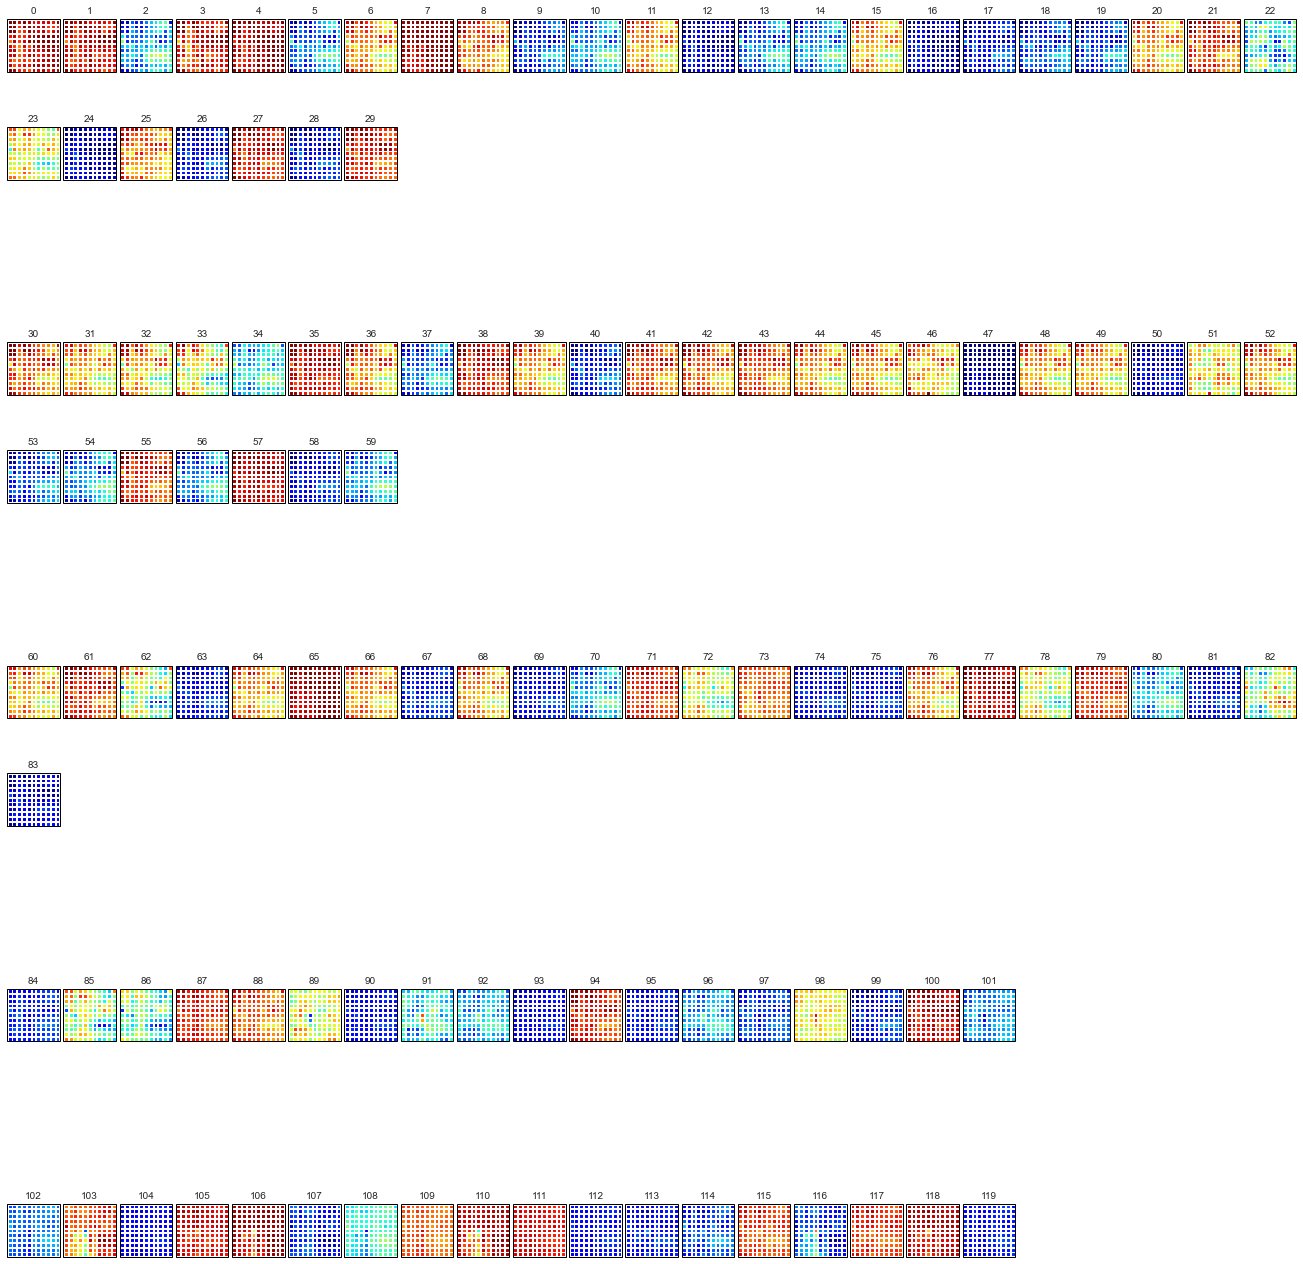

In [11]:
pf.square_plot(g_all, env0, params, plot_specs, name='g0', lims=g_lim, mask=masks[env0], env_class=env_dict.curric_env.envs[env0])

cells (16, 169, 120) env 3 cell (169, 120)
width 11
xs, ys (121,) (121,)
number of cells 120
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 11
width 1

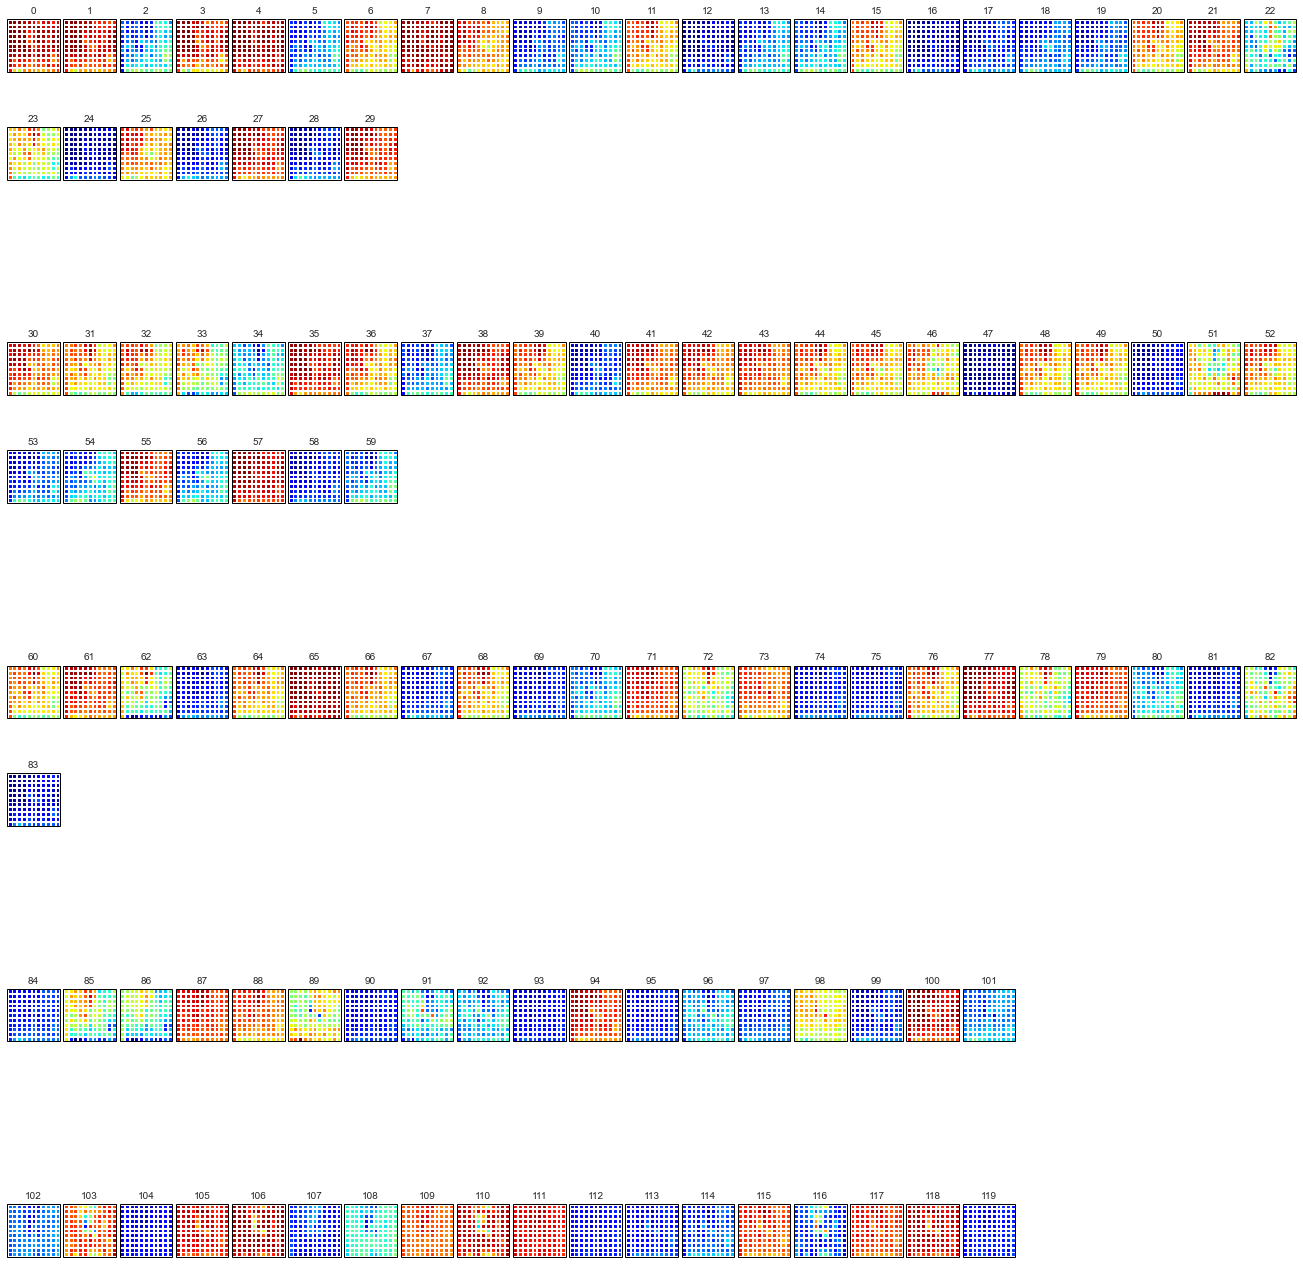

In [12]:
pf.square_plot(g_all, env1, params, plot_specs, name='g1', lims=g_lim, mask=masks[env1], env_class=env_dict.curric_env.envs[env1])